In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns  
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('../data_files/1.Titantic_data/train.csv')
test = pd.read_csv('../data_files/1.Titantic_data/test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
print('Percent of missing "Cabin" records is %.2f%%' %((train['Age'].isnull().sum()/train.shape[0])*100))

Percent of missing "Cabin" records is 19.87%


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

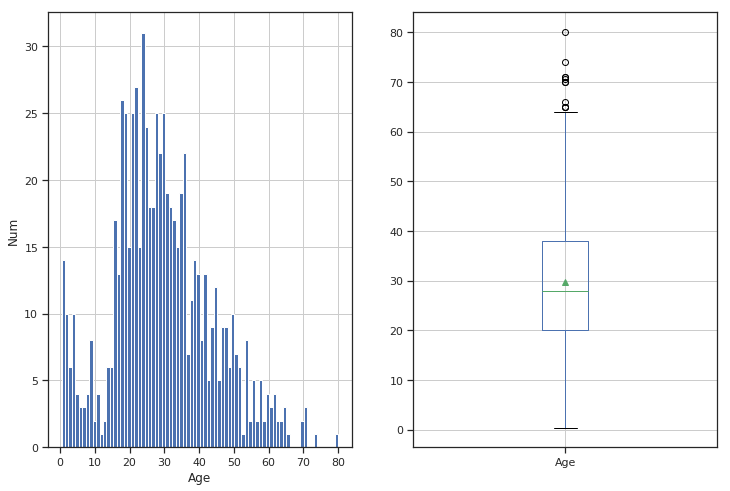

In [8]:
sns.set()
sns.set_style('ticks')

# 缺失值处理：年龄Age字段
train_age=train[train['Age'].notnull()]

# 年龄数据的分布情况
plt.figure(figsize=(12,8))

plt.subplot(121)
train_age['Age'].hist(bins=80)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
train_age.boxplot(column='Age',showfliers=True,showmeans=True)

train_age['Age'].describe()

In [9]:
# 要对缺失值处理
train['Age']=train['Age'].fillna(train['Age'].mean())
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
print('Percent of missing "Cabin" records is %.2f%%' %((train['Cabin'].isnull().sum()/train.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


In [11]:
train.drop(['Cabin'],axis=1,inplace=True)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


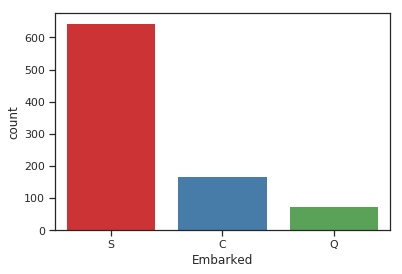

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
sns.countplot(x='Embarked',data=train,palette='Set1')
plt.show()
train['Embarked'].value_counts()

In [14]:
train.Embarked = train.Embarked.fillna('S')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


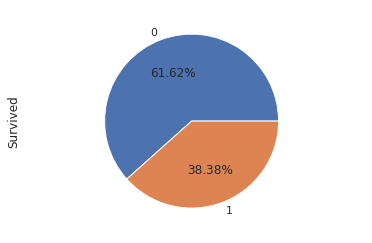

In [16]:
train_survived=train[train['Survived'].notnull()]

# 用seaborn绘制饼图，分析已知存活数据中的存活比例
sns.set_style('ticks') # 十字叉
plt.axis('equal')       #行宽相同
train_survived['Survived'].value_counts().plot.pie(autopct='%1.2f%%')

女性存活率74.20%,男性存活率18.89%


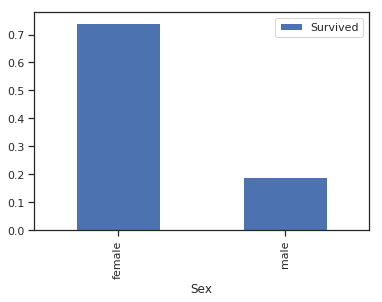

In [17]:
# 男性和女性存活情况
train[['Sex','Survived']].groupby('Sex').mean().plot.bar()

survive_sex=train.groupby(['Sex','Survived'])['Survived'].count()

print('女性存活率%.2f%%,男性存活率%.2f%%' %
     (survive_sex.loc['female',1]/survive_sex.loc['female'].sum()*100,
      survive_sex.loc['male',1]/survive_sex.loc['male'].sum()*100)
     )

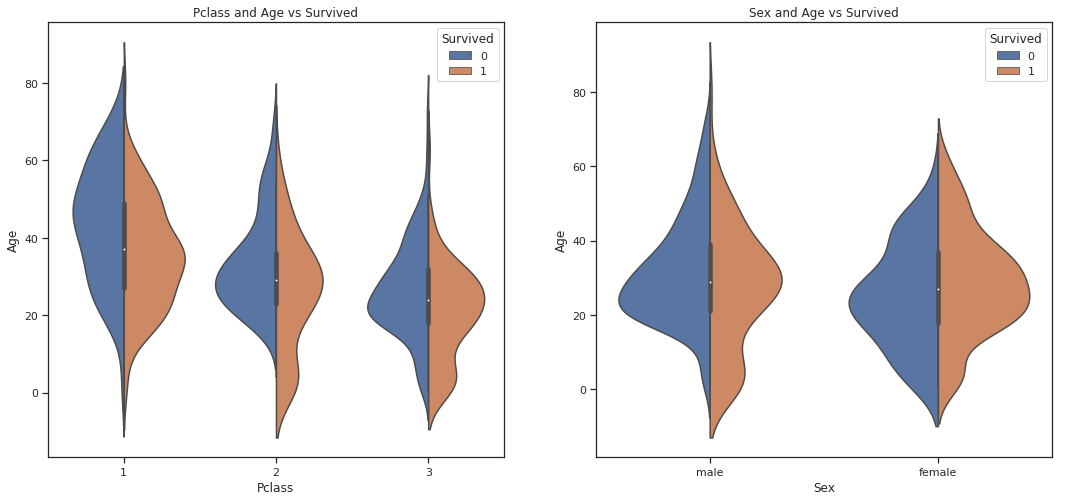

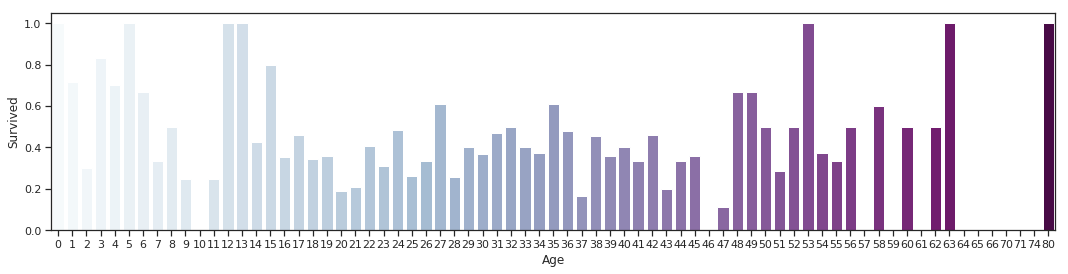

In [18]:
# 年龄与存活关系
fig,ax=plt.subplots(1,2,figsize=(18,8))

sns.violinplot('Pclass','Age',hue='Survived',data=train_age,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')

sns.violinplot('Sex','Age',hue='Survived',data=train_age,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')

# 老人和小孩存活率
plt.figure(figsize=(18,4))
# 年龄都转换成整数
train_age['Age']=train_age['Age'].astype(np.int)
average_age=train_age[['Age','Survived']].groupby('Age',as_index=False).mean()

sns.barplot(x='Age',y='Survived',data=average_age,palette='BuPu')
# plt.grid(linestyele='--',alpha=0.5)

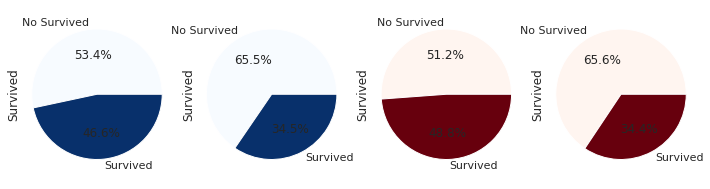

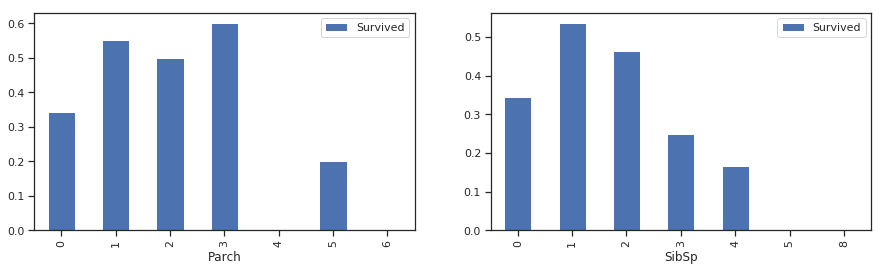

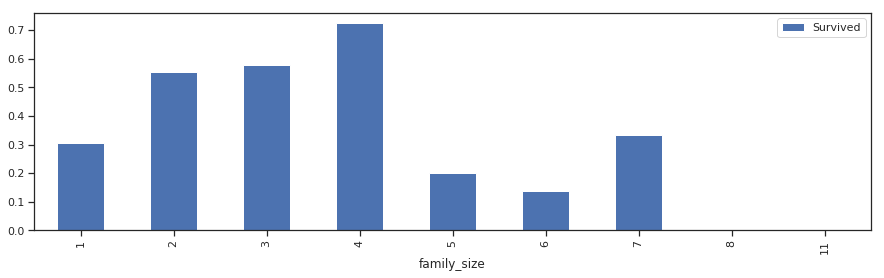

In [19]:
# 筛选出有无兄弟姐妹
sibsp_df = train[train['SibSp']!=0] # 有兄弟姐妹
no_sibsp_df = train[train['SibSp']==0] # 没有兄弟姐妹

# 筛选处有无父母子女
parch_df = train[train['Parch']!=0] # 有父母子女
no_parch_df = train[train['Parch']==0] # 没有父母

plt.figure(figsize=(12,3))
plt.subplot(141)
plt.axis('equal')
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct='%1.1f%%',colormap='Blues')

plt.subplot(142)
plt.axis('equal')
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct='%1.1f%%',colormap='Blues')


plt.subplot(143)
plt.axis('equal')
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct='%1.1f%%',colormap='Reds')

plt.subplot(144)
plt.axis('equal')
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct='%1.1f%%',colormap='Reds')
     

# 亲戚多少与是否存活有关吗？
fig,ax=plt.subplots(1,2,figsize=(15,4))
train[['Parch','Survived']].groupby('Parch').mean().plot.bar(ax=ax[0])
train[['SibSp','Survived']].groupby('SibSp').mean().plot.bar(ax=ax[1])

train['family_size']=train['Parch']+train['SibSp']+1
train[['family_size','Survived']].groupby('family_size').mean().plot.bar(figsize=(15,4))

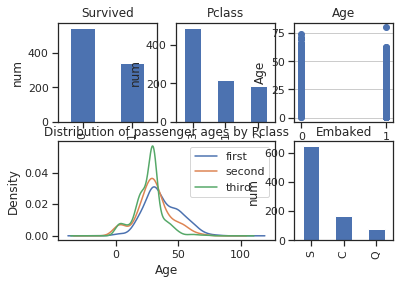

In [20]:
fig=plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((2,3),(0,0))
train.Survived.value_counts().plot(kind='bar')
plt.title('Survived')
plt.ylabel('num')

plt.subplot2grid((2,3),(0,1))
train.Pclass.value_counts().plot(kind='bar')
plt.title('Pclass')
plt.ylabel('num')

plt.subplot2grid((2,3),(0,2))
plt.scatter(train.Survived,train.Age)
plt.ylabel('Age')
plt.grid(b=True,which='major',axis='y')
plt.title('Age')

plt.subplot2grid((2,3),(1,0),colspan=2)
train.Age[train.Pclass == 1].plot(kind='kde')
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of passenger ages by Pclass')
plt.legend(('first','second','third'),loc='best')

plt.subplot2grid((2,3),(1,2))
train.Embarked.value_counts().plot(kind='bar')
plt.title('Embaked')
plt.ylabel('num')
plt.show()

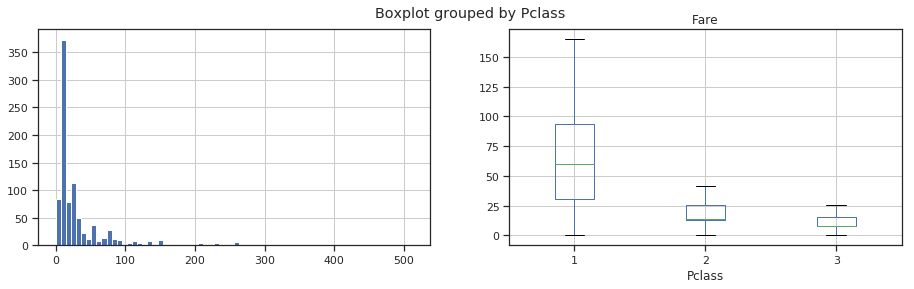

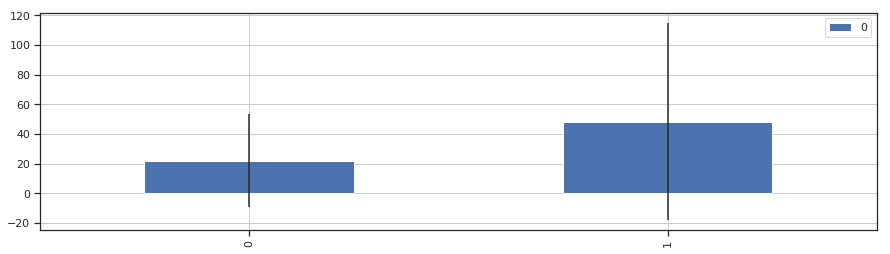

In [21]:
fig,ax=plt.subplots(1,2,figsize=(15,4))
train['Fare'].hist(bins=70,ax=ax[0])
train.boxplot(column='Fare',by='Pclass',showfliers=False,ax=ax[1])

fare_not_survived=train['Fare'][train['Survived']==0]
fare_survived=train['Fare'][train['Survived']==1]
# 筛选数据

average_fare=pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare=pd.DataFrame([fare_not_survived.std(),fare_survived.std()])

average_fare.plot(yerr=std_fare,kind='bar',figsize=(15,4),grid=True)

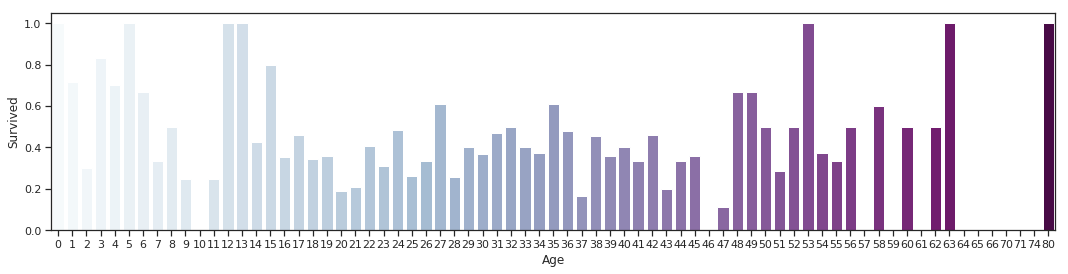

In [22]:
plt.figure(figsize=(18,4))
train_age['Age']=train_age['Age'].astype(np.int)
average_age=train_age[['Age','Survived']].groupby('Age',as_index=False).mean()

sns.barplot(x='Age',y='Survived',data=average_age,palette='BuPu')

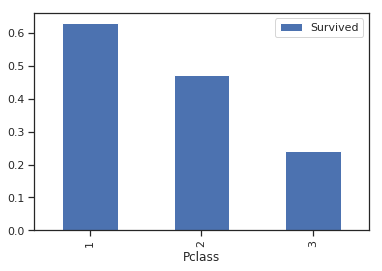

In [23]:
train[['Pclass','Survived']].groupby('Pclass').mean().plot.bar()

Text(0.5, 1.0, 'Sex and Age vs Survived')

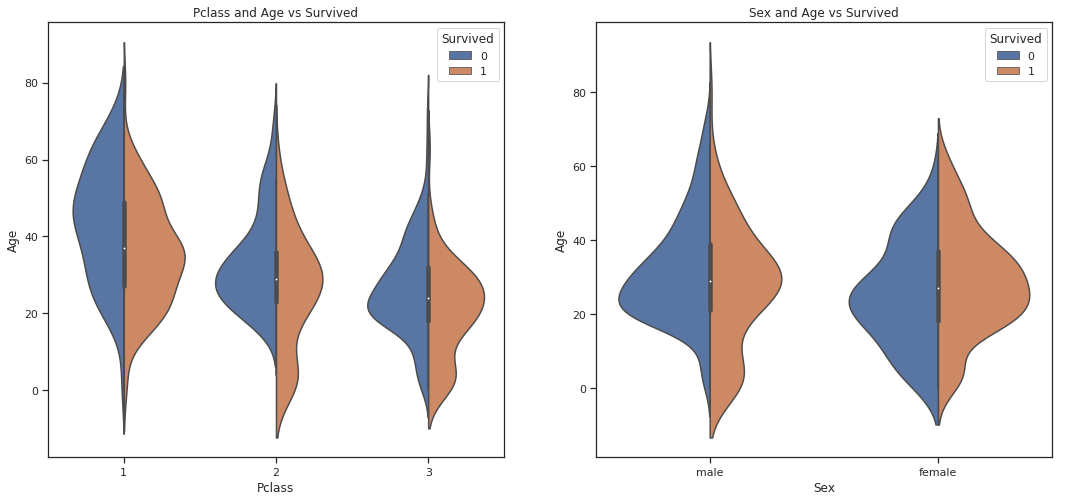

In [24]:
fig,ax=plt.subplots(1,2,figsize=(18,8))

sns.violinplot('Pclass','Age',hue='Survived',data=train_age,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')

sns.violinplot('Sex','Age',hue='Survived',data=train_age,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')


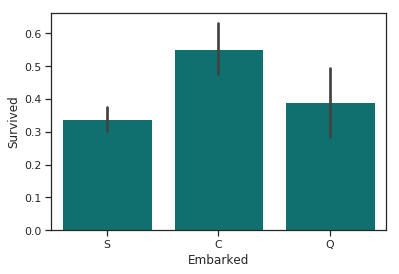

In [25]:
sns.barplot('Embarked', 'Survived', data=train, color="teal")
plt.show()

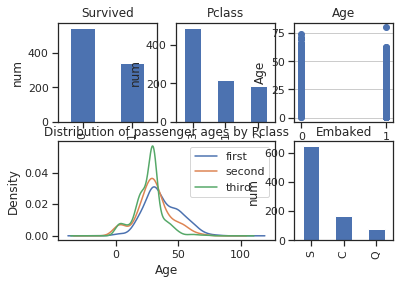

In [26]:
fig=plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((2,3),(0,0))
train.Survived.value_counts().plot(kind='bar')
plt.title('Survived')
plt.ylabel('num')

plt.subplot2grid((2,3),(0,1))
train.Pclass.value_counts().plot(kind='bar')
plt.title('Pclass')
plt.ylabel('num')

plt.subplot2grid((2,3),(0,2))
plt.scatter(train.Survived,train.Age)
plt.ylabel('Age')
plt.grid(b=True,which='major',axis='y')
plt.title('Age')

plt.subplot2grid((2,3),(1,0),colspan=2)
train.Age[train.Pclass == 1].plot(kind='kde')
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of passenger ages by Pclass')
plt.legend(('first','second','third'),loc='best')

plt.subplot2grid((2,3),(1,2))
train.Embarked.value_counts().plot(kind='bar')
plt.title('Embaked')
plt.ylabel('num')
plt.show()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


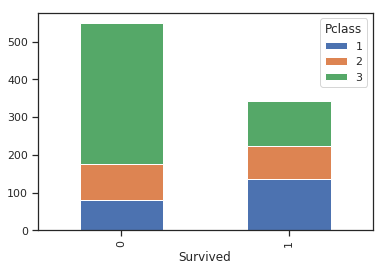

In [27]:
# 查看Survived 与 Pclass的关系
Survived_Pclass = train['Pclass'].groupby(train['Survived'])
print(Survived_Pclass.value_counts().unstack())

Survived_Pclass.value_counts().unstack().plot(kind = 'bar', stacked = True)
plt.show()

Sex       female  male
Survived              
0             81   468
1            233   109


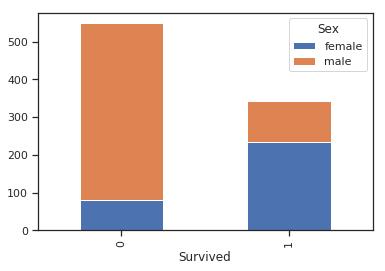

In [28]:
# 查看survived 与 Sex的关系
Survived_Sex = train['Sex'].groupby(train['Survived'])
print(Survived_Sex.value_counts().unstack())

Survived_Sex.value_counts().unstack().plot(kind = 'bar', stacked = True)
plt.show()


In [29]:
train.drop('family_size',axis=1,inplace=True)

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [31]:
test['Age'].mean()

30.272590361445783

In [32]:
test['Age']=test['Age'].fillna(test['Age'].mean())
test['Fare']=test['Fare'].fillna(test['Fare'].mean())
test.drop('Cabin',axis=1,inplace=True)

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [36]:
dataset = train.append(test,sort=False)#合并后的数据，方便一起清洗

In [37]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [38]:
sexdict = {'male':1, 'female':0}
dataset.Sex = dataset.Sex.map(sexdict)

In [39]:
embarked2 = pd.get_dummies(dataset.Embarked, prefix = 'Embarked')

dataset = pd.concat([dataset,embarked2], axis = 1) ## 将编码好的数据添加到原数据上
dataset.drop(['Embarked'], axis = 1, inplace=True) ## 过河拆桥

dataset.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,0,0,1


In [40]:
pclass = pd.get_dummies(dataset.Pclass, prefix = 'Pclass')

dataset = pd.concat([dataset,pclass], axis = 1)
dataset.drop(['Pclass'], axis = 1, inplace=True)

dataset.head(1)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,0,0,1,0,0,1


In [41]:
dataset['family']=dataset.SibSp+dataset.Parch+1

dataset.head(1)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,family
0,1,0.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,0,0,1,0,0,1,2


In [42]:
dataset.drop(['Ticket','Name'], axis = 1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Sex            1309 non-null int64
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1309 non-null float64
Embarked_C     1309 non-null uint8
Embarked_Q     1309 non-null uint8
Embarked_S     1309 non-null uint8
Pclass_1       1309 non-null uint8
Pclass_2       1309 non-null uint8
Pclass_3       1309 non-null uint8
family         1309 non-null int64
dtypes: float64(3), int64(5), uint8(6)
memory usage: 99.7 KB


In [43]:
x_train = dataset.iloc[0:891, :]
y_train = x_train.Survived
x_train.drop(['Survived'], axis=1, inplace =True)

x_test = dataset.iloc[891:, :]
x_test.drop(['Survived'], axis=1, inplace =True)

y_test = pd.read_csv('../data_files/1.Titantic_data/gender_submission.csv')#测试集
y_test=np.squeeze(y_test)

x_train.shape,y_train.shape,x_test.shape, y_test.shape

((891, 13), (891,), (418, 13), (418, 2))

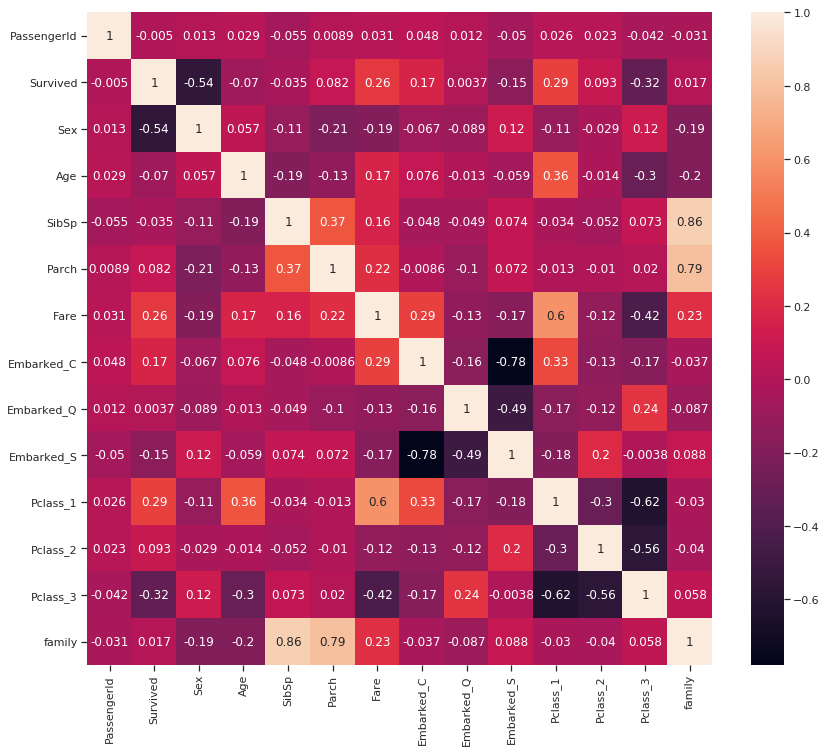

In [44]:
plt.figure(figsize=(14,12))
sns.heatmap(dataset.corr(),annot = True)
plt.show()

In [45]:
x_train = dataset.iloc[0:891, :]
y_train = x_train.Survived
x_train.drop(['Survived'], axis=1, inplace =True)

x_test = dataset.iloc[891:, :]
x_test.drop(['Survived'], axis=1, inplace =True)

y_test = pd.read_csv('../data_files/1.Titantic_data/gender_submission.csv')#测试集
y_test=np.squeeze(y_test)

x_train.shape,y_train.shape,x_test.shape, y_test.shape

((891, 13), (891,), (418, 13), (418, 2))

In [46]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression()

model.fit(x_train.iloc[0:-100,:],y_train.iloc[0:-100])
accuracy_score(model.predict(x_train.iloc[-100:,:]),y_train.iloc[-100:].values.reshape(-1,1))

0.82

In [47]:
prediction1 = model.predict(x_test)
result = pd.DataFrame({'PassengerId':y_test['PassengerId'].values, 'Survived':prediction1.astype(np.int32)})
result.to_csv("../results/predictions1.csv", index=False)
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [48]:
accuracy_score(y_test['Survived'], prediction1)

0.9593301435406698

In [49]:
model2 = LogisticRegression()
model2.fit(x_train,y_train)

prediction2 = model2.predict(x_test)
accuracy_score(y_test['Survived'], prediction2)

0.9497607655502392

In [50]:
result = pd.DataFrame({'PassengerId':y_test['PassengerId'].values, 'Survived':prediction2.astype(np.int32)})
result.to_csv("../results/predictions2.csv", index=False)
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [51]:
pd.concat((pd.DataFrame(x_train.columns, columns = ['variable']), 
           pd.DataFrame(abs(model.coef_[0]), columns = ['importance'])), 
           axis = 1).sort_values(by='importance', ascending = False)[:15]

,variable,importance
1,Sex,2.669119
9,Pclass_1,1.086309
10,Pclass_2,0.586247
3,SibSp,0.571004
6,Embarked_C,0.559438
11,Pclass_3,0.459674
4,Parch,0.381664
7,Embarked_Q,0.371561
8,Embarked_S,0.281883
12,family,0.260215


In [52]:
from sklearn.model_selection import cross_val_score, train_test_split
cross_val_score(model2, x_train, y_train, cv=5,scoring='accuracy')

array([0.81005587, 0.79775281, 0.78651685, 0.76966292, 0.8258427 ])

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(model2.predict(x_train.iloc[-100:,:]),y_train.iloc[-100:].values.reshape(-1, 1))

0.85

In [54]:
pd.concat((pd.DataFrame(x_train.columns, columns = ['variable']), 
           pd.DataFrame(abs(model2.coef_[0]), columns = ['importance'])), 
           axis = 1).sort_values(by='importance', ascending = False)[:15]

,variable,importance
1,Sex,2.618185
9,Pclass_1,1.367680
6,Embarked_C,0.702703
3,SibSp,0.646847
10,Pclass_2,0.582498
11,Pclass_3,0.578508
7,Embarked_Q,0.447769
4,Parch,0.400804
12,family,0.324019
8,Embarked_S,0.221198


In [55]:
lr_param_grid={'C':[0.01,0.1,0.2,1,2,10],'penalty':['l1','l2'],'solver':['liblinear'], 'tol':[1e-6]}

In [56]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(LogisticRegression(),param_grid=lr_param_grid,cv=5,scoring='accuracy')

In [57]:
grid.fit(x_train, y_train)
grid.best_estimator_,grid.best_score_,grid.best_params_

(LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=1e-06, verbose=0,
                    warm_start=False),
 0.79686774213797,
 {'C': 1, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-06})

In [58]:
prediction1 = grid.best_estimator_.predict(x_test)
accuracy_score(y_test['Survived'], prediction1)

0.9497607655502392

In [59]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=5, min_samples_split=1.0,
                                min_samples_leaf=1, max_features='auto',    bootstrap=False, oob_score=False, n_jobs=1, random_state=0,
                                verbose=0)
model3.fit(x_train, y_train)
prediction3 =  model3.predict(x_test)

result = pd.DataFrame({'PassengerId':y_test['PassengerId'].values, 'Survived':prediction3.astype(np.int32)})
result.to_csv("../results/predictions3.csv", index=False)
accuracy_score(y_test['Survived'], prediction3)

0.8038277511961722

In [60]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_impurity_decrease=0.0)
model4.fit(x_train, y_train)
prediction4 = model4.predict(x_test)

result = pd.DataFrame({'PassengerId':y_test['PassengerId'].values, 'Survived':prediction4.astype(np.int32)})
result.to_csv("../results/predictions4.csv", index=False)
accuracy_score(y_test['Survived'], prediction4)

0.7966507177033493

In [64]:
prediciton_vote = pd.DataFrame({'PassengerId': y_test['PassengerId'],
                                 'Vote': prediction1.astype(int)+prediction2.astype(int)+prediction3.astype(int)})

vote = { 0:False,1:False,2:True,3:True}

prediciton_vote['Survived']=prediciton_vote['Vote'].map(vote)

prediciton_vote.head()

,PassengerId,Vote,Survived
0,892,0,False
1,893,0,False
2,894,0,False
3,895,0,False
4,896,2,True


In [65]:
accuracy_score(y_test['Survived'], prediciton_vote['Survived'].values)

0.9497607655502392

In [66]:
result = pd.DataFrame({'PassengerId':y_test['PassengerId'].values, 'Survived':prediciton_vote.Survived.astype(np.int32)})
result.to_csv("../results/predictions5.csv", index=False)

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns  
import warnings
warnings.filterwarnings("ignore")

train = pd.read_csv('../data_files/1.Titantic_data/train.csv')
test = pd.read_csv('../data_files/1.Titantic_data/test.csv')

train['Age']=train['Age'].fillna(train['Age'].mean()) # 用平均值填充
train.drop(['Cabin'],axis=1,inplace=True) # 删去Cabin的那一列数据
train.Embarked = train.Embarked.fillna('S') # 用’S'填补缺失值

test['Age']=test['Age'].fillna(test['Age'].mean())
test['Fare']=test['Fare'].fillna(test['Fare'].mean())
test.drop('Cabin',axis=1,inplace=True)

dataset = train.append(test,sort=False)#合并后的数据，方便一起清洗

sexdict = {'male':1, 'female':0}
dataset.Sex = dataset.Sex.map(sexdict)

embarked2 = pd.get_dummies(dataset.Embarked, prefix = 'Embarked')

dataset = pd.concat([dataset,embarked2], axis = 1) ## 将编码好的数据添加到原数据上
dataset.drop(['Embarked'], axis = 1, inplace=True) ## 过河拆桥

pclass = pd.get_dummies(dataset.Pclass, prefix = 'Pclass')

dataset = pd.concat([dataset,pclass], axis = 1)
dataset.drop(['Pclass'], axis = 1, inplace=True)

dataset['family']=dataset.SibSp+dataset.Parch+1

dataset.drop(['Ticket','Name'], axis = 1, inplace=True)
x_train = dataset.iloc[0:891, :]
y_train = x_train.Survived
x_train.drop(['Survived'], axis=1, inplace =True)

x_test = dataset.iloc[891:, :]
x_test.drop(['Survived'], axis=1, inplace =True)

y_test = pd.read_csv('../data_files/1.Titantic_data/gender_submission.csv')#测试集
y_test=np.squeeze(y_test)

x_train.shape,y_train.shape,x_test.shape, y_test.shape

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression()

model.fit(x_train.iloc[0:-100,:],y_train.iloc[0:-100])
accuracy_score(model.predict(x_train.iloc[-100:,:]),y_train.iloc[-100:].values.reshape(-1,1))

prediction1 = model.predict(x_test)
result = pd.DataFrame({'PassengerId':y_test['PassengerId'].values, 'Survived':prediction1.astype(np.int32)})
result.to_csv("../results/predictions1.csv", index=False)

model2 = LogisticRegression()
model2.fit(x_train,y_train)

prediction2 = model2.predict(x_test)

result = pd.DataFrame({'PassengerId':y_test['PassengerId'].values, 'Survived':prediction2.astype(np.int32)})
result.to_csv("../results/predictions2.csv", index=False)

# 随机森林
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=5, min_samples_split=1.0,
                                min_samples_leaf=1, max_features='auto',    bootstrap=False, oob_score=False, n_jobs=1, random_state=0,
                                verbose=0)
model3.fit(x_train, y_train)
prediction3 =  model3.predict(x_test)

result = pd.DataFrame({'PassengerId':y_test['PassengerId'].values, 'Survived':prediction3.astype(np.int32)})
result.to_csv("../results/predictions3.csv", index=False)

from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_impurity_decrease=0.0)
model4.fit(x_train, y_train)
prediction4 = model4.predict(x_test)

result = pd.DataFrame({'PassengerId':y_test['PassengerId'].values, 'Survived':prediction4.astype(np.int32)})
result.to_csv("../results/predictions4.csv", index=False)

prediciton_vote = pd.DataFrame({'PassengerId': y_test['PassengerId'],
                                 'Vote': prediction1.astype(int)+prediction2.astype(int)+prediction3.astype(int)})
vote = { 0:False,1:False,2:True,3:True}

prediciton_vote['Survived']=prediciton_vote['Vote'].map(vote)

prediciton_vote.head()

result = pd.DataFrame({'PassengerId':y_test['PassengerId'].values, 'Survived':prediciton_vote.Survived.astype(np.int32)})
result.to_csv("../results/predictions5.csv", index=False)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns  
import warnings
warnings.filterwarnings("ignore")
train = pd.read_csv('../data_files/1.Titantic_data/train.csv')
test = pd.read_csv('../data_files/1.Titantic_data/test.csv')

In [26]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Figure size 432x288 with 0 Axes>

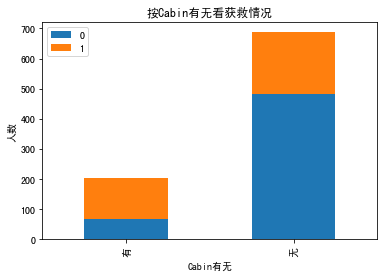

In [27]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = train.Survived[pd.notnull(train.Cabin)].value_counts()
Survived_nocabin = train.Survived[pd.isnull(train.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")
plt.show()

In [28]:
train['Age']=train['Age'].fillna(train['Age'].mean()) # 用平均值填充
train.drop(['Cabin'],axis=1,inplace=True) # 删去Cabin的那一列数据
train.Embarked = train.Embarked.fillna('S') # 用’S'填补缺失值

test['Age']=test['Age'].fillna(test['Age'].mean())
test['Fare']=test['Fare'].fillna(test['Fare'].mean())
test.drop('Cabin',axis=1,inplace=True)

In [24]:
# dummies_Cabin = pd.get_dummies(train['Cabin'],prefix='Cabin')

# dummies_Embarked = pd.get_dummies(train['Embarked'],prefix='Embarked')

# dummies_Sex = pd.get_dummies(train['Sex'],prefix='Sex')

# dummies_Pclass = pd.get_dummies(train['Pclass'],prefix='Pclass')

# train = pd.concat([train,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass],axis=1)
# train.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
# train.head()

In [31]:
dataset = train.append(test,sort=False)#合并后的数据，方便一起清洗

# dataset.loc[(dataset.Cabin.notnull()),'Cabin'] = 'Yes'
# dataset.loc[(dataset.Cabin.isnull()),'Cabin'] = 'No'

# cabin = pd.get_dummies(dataset.Cabin,prefix='Cabin')
# dataset.drop(['Cabin'],axis=1,inplace=True)
# dataset = pd.concat([dataset,cabin], axis = 1)

sexdict = {'male':1, 'female':0}
dataset.Sex = dataset.Sex.map(sexdict)

embarked2 = pd.get_dummies(dataset.Embarked, prefix = 'Embarked')

dataset = pd.concat([dataset,embarked2], axis = 1) ## 将编码好的数据添加到原数据上
dataset.drop(['Embarked'], axis = 1, inplace=True) ## 过河拆桥

pclass = pd.get_dummies(dataset.Pclass, prefix = 'Pclass')

dataset = pd.concat([dataset,pclass], axis = 1)
dataset.drop(['Pclass'], axis = 1, inplace=True)

dataset['family']=dataset.SibSp+dataset.Parch+1

dataset.drop(['Ticket','Name'], axis = 1, inplace=True)

In [32]:
x_train = dataset.iloc[0:891, :]
y_train = x_train.Survived
x_train.drop(['Survived'], axis=1, inplace =True)

x_test = dataset.iloc[891:, :]
x_test.drop(['Survived'], axis=1, inplace =True)

y_test = pd.read_csv('../data_files/1.Titantic_data/gender_submission.csv')#测试集
y_test=np.squeeze(y_test)

x_train.shape,y_train.shape,x_test.shape, y_test.shape

((891, 13), (891,), (418, 13), (418, 2))

In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')# 选择ID3算法，即用entropy衡量纯度

clf = clf.fit(x_train,y_train)

In [35]:
predicted = clf.predict(x_train)

In [36]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train,predicted)#或者直接使用clf.score
print('accuracy_score:',acc)

accuracy_score: 1.0


In [39]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_train,predicted)
m

array([[549,   0],
       [  0, 342]])

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       549
         1.0       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



In [44]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)

from sklearn.model_selection import cross_val_score
acc = cross_val_score(clf,x_train,y_train,cv=10)
acc

array([0.66666667, 0.79775281, 0.75280899, 0.62921348, 0.8988764 ,
       0.71910112, 0.83146067, 0.83146067, 0.78651685, 0.84269663])

In [45]:
print(acc.mean())

0.7756554307116105


In [46]:
clf.feature_importances_

array([0.22475793, 0.22656221, 0.18600592, 0.02783334, 0.01414729,
       0.16605715, 0.00392361, 0.01121017, 0.        , 0.00467295,
       0.01464706, 0.08344428, 0.0367381 ])

In [47]:
clf.feature_importances_.argsort()[::-1]

array([ 1,  0,  2,  5, 11, 12,  3, 10,  4,  7,  9,  6,  8])

In [49]:
x_train.columns[clf.feature_importances_.argsort()[::-1]]

Index(['Sex', 'PassengerId', 'Age', 'Fare', 'Pclass_3', 'family', 'SibSp',
       'Pclass_2', 'Parch', 'Embarked_Q', 'Pclass_1', 'Embarked_C',
       'Embarked_S'],
      dtype='object')

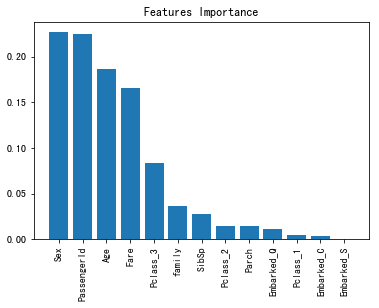

In [51]:
importances = clf.feature_importances_
names = x_train.columns
plt.title('Features Importance')
plt.bar(range(0,len(names)),importances[importances.argsort()[::-1]])
plt.xticks(range(0,len(names)),names[importances.argsort()[::-1]],rotation=90)
plt.show()

In [52]:
train_features = x_train
train_labels = y_train

In [87]:
from sklearn import tree
graphtree = tree.export_graphviz(clf,out_file='tree.dot')

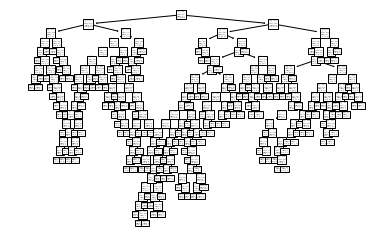

In [93]:
tree.plot_tree(clf);

In [102]:
import pydotplus
with open('tree.dot', 'w') as f:
 
    dot_data = tree.export_graphviz(clf, out_file=None)
 
    f.write(dot_data)
 
 
#画图方法2-生成pdf文件
 
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=clf.feature_importances_,
 
filled=True, rounded=True, special_characters=True)
 
graph = pydotplus.graph_from_dot_data(dot_data)
 
###保存图像到pdf文件
 
graph.write_pdf("treetwo.pdf")
 

True